# Regular Expression

In [1]:
import re

This example replaces any occurrence of an L, R, U, or D followed by one or more digits with
'***'.


In [2]:
print(re.sub(r'([LRUD])(\d+)', '***', 'Locations L3 and D22 full.'))

Locations *** and *** full.


sub The sub function works as follows: 
<br>


$ sub(pattern, replacement, string) $

This searches through string for pattern and replaces anything matching that pattern with the
string replacement. All of the upcoming examples will be shown with sub, but there are other
things we can do with regular expressions besides substituting. We will get to those after discussing
the syntax of regular expressions.

### Raw strings 
 A lot of the patterns use backslashes. However, backslashes in strings are used for
escape characters, like the newline, \n. To get a backslash in a string, we need to do \\. This
can quickly clutter up a regular expression. To avoid this, our patterns will be raw strings, where
backslashes can appear as is and don’t do anything special. To mark a string as a raw string, preface
it with an r like below:

In [3]:
s = r'This is a raw string. Backslashes do not do anything special.'

### Syntax

**Basic example:**   We start with a regular expression that mimics the replace method of strings.
Here is a example of using replace to replace all occurrences of abc with *:

In [4]:
word= 'abcdef abcxyz'
word.replace('abc', '*')


'*def *xyz'

Here is the regular expression code that does the same thing:


In [5]:
re.sub(r'abc', '*', 'abcdef abcxyz')

'*def *xyz'

#### Square brackets 

We can use square brackets to indicate that we only want to match certain letters.
Here is an example where we replace every a and d with asterisks:


In [6]:
word= "daddy"
re.sub(r'[ad]', '*', word)

'****y'

In [7]:
re.sub(r'[$,]', "","$10,000")

'10000'

Here is another example, where an asterisk replaces all occurrences of an a, b, or c that is followed
by a 1, 2, or 3:


In [8]:
word= 'a1 + b2 + c3 + d4 + e5'
re.sub(r'[abc][123]', '*', word)


'* + * + * + d4 + e5'

We can give ranges of values—for example, [a-j] for the letters a through j. Here are some
further examples of ranges:

Range &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Description <br>
[A-Z] &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;any capital letter <br>
[0-9] &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;any digit<br>
[A-Za-z0-9] &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;any letter or digit<br>

A slightly shorter way to match any digit is \d, instead of [0-9].

In [9]:
word= 'a1 + b2 + c3 + d4 + e5'
re.sub(r'[a-z][\d]', '*', word)

'* + * + * + * + *'

**Matching any character:** Use a dot to match (almost) any character. Here is an example:

In [10]:
re.sub(r'A.B', '*', 'A2B AxB AxxB A$B')

'* * AxxB *'

The pattern matches an $A$ followed by almost any single character followed by a $B$.
Exception: The one character not matched by the dot is the newline character. If you need that to
be matched, too, put *?s* at the start of your pattern.


**Matching multiple copies of something**  &ensp; Here is an example where we match an A followed by
one or more B’s:

In [11]:
re.sub(r'AB+', '*', 'ABC ABBBBBBC AC')


'*C *C AC'

We use the + character to indicate that we want to match one or more B’s here. There are similar
things we can use to specify different numbers of B’s here. For instance, using * in place of + will
match zero or more B’s. (This means that AC in the example above would be replaced by *C because
A counts as an A followed by zero B’s.) Here is a table of what you can do:


Code &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; Description <br>
\+ &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;  match 1 or more occurrences <br>
\* &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; match 0 or more occurrences <br>
? &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; match 0 or 1 occurrence <br>
{m}&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; match exactly m occurrences <br>
{m,n}&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; match between m and n occurrences, inclusive <br>

In [12]:
re.sub(r'AB*', '*', 'ABC ABBBBBBC AC')

'*C *C *C'

In [13]:
re.sub(r'AB?', '*', 'ABC ABBBBBBC AC')

'*C *BBBBBC *C'

In [14]:
re.sub(r'AB{3}', '*', 'ABC ABBBBBBC AC')

'ABC *BBBC AC'

In [15]:
re.sub(r'AB{3,7}', '*', 'ABC ABBBBBBC AC')

'ABC *C AC'

In [16]:
re.sub(r'AB{1,3}?', '*', 'ABB ABBB ABBBB ABBBBBBBBB')

'*B *BB *BBB *BBBBBBBB'

The $?$ can go after any of the numeric specifiers, like $+?, -?, ??$, etc.


**The | character** The | character acts as an “or.” Here is an example:

In [17]:
re.sub(r'abc|xyz', '*', 'abcdefxyz123abc')

'*def*123*'

**Matching only at the start or end:**  Sometimes you don’t want to match every occurrence of something, maybe just the first or the last occurrence. To match just the first occurrence of something,
start the pattern off with the ^ character. To match just the last occurrence, end the pattern with the
$ character. Here are some examples:

In [18]:
re.sub('^abc', '*', 'abcdefgabc')

'*defgabc'

In [19]:
re.sub('abc$', '*', 'abcdefgabc')

'abcdefg*'

In [20]:
re.sub('@gmail.com$', '', 'josesholly499@gmail.com')

'josesholly499'

In [21]:
re.sub('^234', '0', '2348177249078')

'08177249078'

**Escaping special characters:** We have seen that + and * have special meanings. What if we need
to match a plus sign? To do so, use the backslash to escape it, like \+. Here is an example:


In [22]:
re.sub(r'AB\+', '*', 'AB+C')


'*C'

#### Backslash sequences

- \d matches any digit, and \D matches any non-digit. Here is an example:

In [23]:
re.sub(r'\d', '*', '3 + 14 = 17')


'* + ** = **'

In [24]:
re.sub(r'\D', '*', '3 + 14 = 17')

'3***14***17'

- \w matches any letter or number, and \W matches anything else. Here is an example:

In [25]:
re.sub(r'\w', '*', 'This is a test. Or is it?')


'**** ** * ****. ** ** **?'

In [26]:
re.sub(r'\W', '*', 'This is a test. Or is it?')


'This*is*a*test**Or*is*it*'

-  \s matches whitespace, and \S matches non-whitespace. Here is an example

In [27]:
re.sub(r'\s', '*', 'This is a test. Or is it?')


'This*is*a*test.*Or*is*it?'

In [28]:
re.sub(r'\S', '*', 'This is a test. Or is it?')

'**** ** * ***** ** ** ***'

**Preceding and following matches** Sometimes you want to match things if they are preceded or
followed by something.

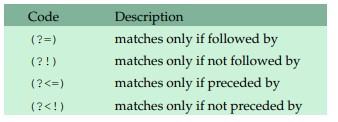



Here is an example that matched *__the__* word the only if it is followed by cat:

In [29]:
re.sub(r'the(?= cat)', '*', 'the dog and the cat')


'the dog and * cat'

Here is an example that matches *__the__* word the only if it is preceded by a **is**  :

In [30]:

re.sub(r'(?<=is )the', '*', 'Athens is the capital.')
# Notice the whhitespace after word "is"

'Athens is * capital.'

The following example will match the word *__the__* only if it neither preceded by and nor followed by
letters, so you can use it to replace occurrences of the word the, but not occurrences of the within
other words.


In [31]:
re.sub(r'(?<!\w)[Tt]he(?!\w)', '*', 'The cat is on the lathe there.')


'* cat is on * lathe there.'

#### Flags
 There are a few flags that you can use to affect the behavior of a regular expression. We
look at a few of them here.


-  (?i) — This is to ignore case. Here is an example:

In [32]:
re.sub('(?i)ab', '*', 'ab AB')

'* *'

- (?s) — Recall the . character matches any character except a newline. This flag makes it
match newline characters, too.

In [33]:
re.sub('(?s)ab', '*', 'ab AB.')

'* AB.'

- (?x) — Regular expressions can be long and complicated. This flag allows you to use a more
verbose, multi-line format, where whitespace is ignored. You can also put comments in. Here
is an example:

In [34]:
pattern = r"""(?x)[AB]\d+ # Match A or B followed by some digits
                [CD]\d+ # Match C or D followed by some digits """
print(re.sub(pattern, '*', 'A3C9 and C1B17'))


* and C1B17


# Summary

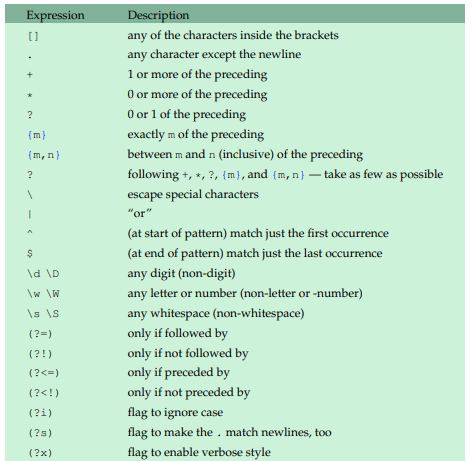

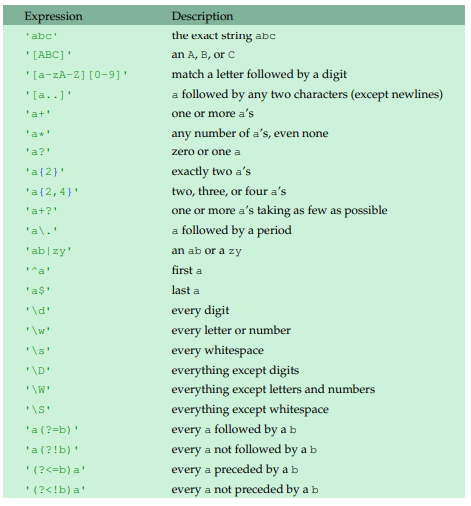

**Note** Note that in all of the examples in this chapter, we are dealing with non-overlapping patterns.
For instance, if we look for the pattern 'aba' in the string 'abababa', we see there are several
overlapping matches. All of our matching is done from the left and does not consider overlaps. For
instance, we have the following:

In [35]:
re.sub('aba', '*', 'abababa')


'*b*'

## Groups

Using parentheses around part of an expression creates a group that contains the text that matches a
pattern. You can use this to do more sophisticated substitutions. 

Here is an example that converts
to lowercase every capital letter that is followed by a lowercase letter:

In [36]:
def modify(match):
    letter = match.group()
    return letter.lower()
re.sub(r'([A-Z])[a-z]', modify, 'PEACH Apple ApriCot')


'PEACH apple apricot'

The *modify* function ends up getting called three times, one for each time a match occurs. The
re.sub function automatically sends to the *modify* function a Match object, which we name
match. This object contains information about the matching text. The object’s group method
returns the matching text itself.

If instead of match.group, we use match.groups, then we can further break down the match
according the groups defined by the parentheses. Here is an example that matches a capital letter
followed by a digit and converts each letter to lowercase and adds 10 to each number:

In [37]:
def modify(match):
    letter, number = match.groups()
    return letter.lower() + str(int(number)+10)
re.sub(r'([A-Z])(\d)', modify, 'A1 + B2 + C7')

'a11 + b12 + c17'

The groups method returns the matching text as tuples. For instance, in the above program the
tuples returned are shown below:

*First match: ('A', '1') <br>
Second match: ('B', '2') <br>
Third match: ('C', '7')*

**Note** also that we can get at this information by passing arguments to match.group. For the first
match, match.group(1) is 'A' and match.group(2) is 1.


## Other functions

- sub — We have seen many examples of sub. One thing we haven’t mentioned is that there
is an optional argument count, which specifies how many matches (from the left) to make.
Here is an example:

In [38]:
re.sub(r'a', '*', 'ababababa', count=2)


'*b*bababa'

• findall — The findall function returns a list of all the matches found. Here is an example:

In [39]:
re.findall(r'[AB]\d', 'A3 + B2 + A9')


['A3', 'B2', 'A9']

In [40]:
re.findall(r'\w+', s)


['This',
 'is',
 'a',
 'raw',
 'string',
 'Backslashes',
 'do',
 'not',
 'do',
 'anything',
 'special']

• split — The split function is analogous to the string method split. The regular expression version allows us to split on something more general than the string method does. Here
is an example that splits an algebraic expression at + or -.

In [41]:
re.split(r'\+|\-', '3x+4y-12x^2+7')

['3x', '4y', '12x^2', '7']

• match and search — These are useful if you just want to know if a match occurs. The
difference between these two functions is match only checks to see if the beginning of the
string matches the pattern, while search searches through the string until it finds a match.
Both return None if they fail to find a match and a Match object if they do find a match. Here
are examples:


In [42]:
if (re.match(r'ZZZ', 'abc ZZZ xyz')): print('Match found at beginning.')
else: print('No match at beginning')
if (re.search(r'ZZZ', 'abc ZZZ xyz')): print('Match found in string.')
else: print('No match found.')


No match at beginning
Match found in string.


The Match object returned by these functions has group information in it. Say we have the
following:

In [43]:
a=re.search(r'([ABC])(\d)', '= A3+B2+C8')
a.group()


'A3'

In [44]:
a.group(1)


'A'

In [45]:
a.group(2)

'3'

Remember that re.search will only report on the first match it finds in the string.

• finditer — This returns an iterator of Match objects that we can loop through, like below:

In [46]:
for s in re.finditer(r'([AB])(\d)', 'A3+B4'):
    print(s.group(1), s.group(2))


A 3
B 4


• compile — If you are going to be reusing the same pattern, you can save a little time by first
compiling the pattern, as shown below:


In [47]:
pattern = re.compile(r'[AB]\d')
pattern.sub('*', 'A3 + B4')


'* + *'

In [48]:
pattern.sub('x', 'A8 + B9')

'x + x'

In [49]:
pattern = re.compile(r'[AB]\d')
pattern.findall('A3+B4+C9+D8',2,6)


['B4']

# Roman Numerals

In [50]:
import re
d = {'M':1000, 'CM':900, 'D':500, 'CD':400, 'C':100, 'XC':90,
'L':50, 'XL':40, 'X':10, 'IX':9, 'V':5, 'IV':4,'I':1}
pattern = re.compile(r"""(?x)
                    (M{0,3})(CM)?
                    (CD)?(D)?(C{0,3})
                    (XC)?(XL)?(L)?(X{0,3})
                    (IX)?(IV)?(V)?(I{0,3})""")
num = input('Enter Roman numeral: ').upper()
m = pattern.match(num)
sum = 0
for x in m.groups():
    if x!=None and x!='':
        if x in ['CM', 'CD', 'XC', 'XL', 'IX', 'IV']:
            sum+=d[x]
        elif x[0] in 'MDCLXVI':
            sum+=d[x[0]]*len(x)
print(sum)

1900


**Dates** Here we use a regular expression to take a date in a verbose format, like February 6, 2011,
and convert it an abbreviated format, mm/dd/yy (with no leading zeroes). Rather than depend
on the user to enter the date in exactly the right way, we can use a regular expression to allow for
variation and mistakes. For instance, this program will work whether the user spells out the whole
month name or abbreviates it (with or with a period). Capitalization does not matter, and it also
does not matter if they can even spell the month name correctly. They just have to get the first three
letters correct. It also does not matter how much space they use and whether or not they use a
comma after the day.

In [51]:
import re

d = {'jan':'1', 'feb':'2', 'mar':'3', 'apr':'4',
'may':'5', 'jun':'6', 'jul':'7', 'aug':'8',
'sep':'9', 'oct':'10', 'nov':'11', 'dec':'12'}

date = input('Enter date: ')

m = re.match('([A-Za-z]+)\.?\s*(\d{1,2}),?\s*(\d{4})', date)

print('{}/{}/{}'.format(d[m.group(1).lower()[:3]],
m.group(2), m.group(3)[-2:]))

2/22/21


In [52]:
date= "12/2/2021"

date.split("/")

['12', '2', '2021']